In [2]:
from timeit import Timer
from humanfriendly import format_timespan

from dwrangling.pipelines \
    import get_opt_dataframe
from dwrangling.dataframes \
    import ObservablesDataFrame as ODataFrame
from dwrangling.dataframes.observables \
    import add_reconstructed_observables
from trees.functions \
    import gini_impurity
from trees._BinaryDecisionTree \
    import _BinaryTreeEstimator as BDTEst, \
           _BinaryTreeClassifier as BDTClass

import analysis.metrics as AM
import analysis.plotting.clout as APC
from analysis.plotting \
    import std_cmap
from analysis.pipeline \
    import show_tree_paths

import collections
class OrderedDict(collections.OrderedDict):
    def rename(self, key, new_key):
        if (key not in self) or (new_key in self): return
        edited_dict = [(k, value) if k!=key else (new_key, value)
                        for k, value in self.items()]
        self.clear(); self.update(edited_dict)

In [1]:
from analysis.pipeline import analyse
from trees._BinaryDecisionTree \
    import _BinaryTreeEstimator as DTE, \
           _BinaryTreeClassifier as DTC
# from trees._BinaryDecisionTree import _BinaryTreeClassifier as BDTClass

================================== Obtaining DataFrame ===================================

================================== Training Classifier ===================================

BinaryTreeClassifier(Fitted: False; 'max_depth': 12, 'min_samples_leaf': 0, 'min_samples_split': 800, 'max_observables': None, 'random_minimize': None, 'train_val_frac': 0.75) 

BinaryTreeClassifier(Fitted: True; 'max_depth': 12, 'min_samples_leaf': 0, 'min_samples_split': 800, 'max_observables': None, 'random_minimize': None, 'train_val_frac': 0.75) 

Time Taken: 1 second and 464.02 milliseconds 

=================================== Testing Classifier ===================================

=========================== Analysing Classifier Probabilities ===========================
---------------------------------------- Results -----------------------------------------
Probability Threshold: 0.9687500000000002
cm : {'tn': 1963, 'fp': 3, 'fn': 498, 'tp': 1536}
a : 0.87475
p : 0.9980506822612085
tpr : 0.75516

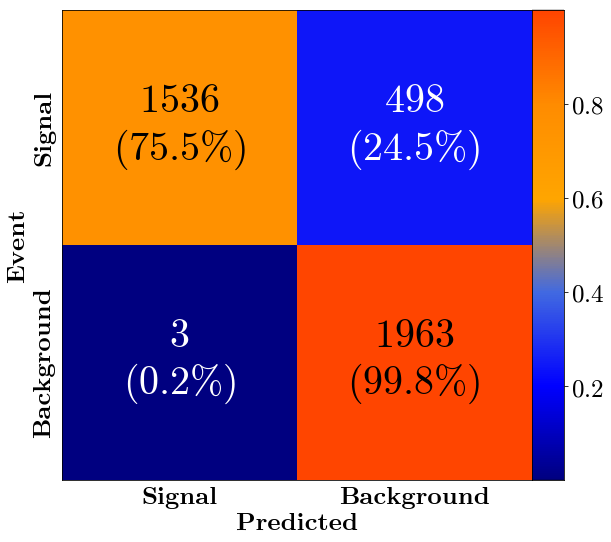

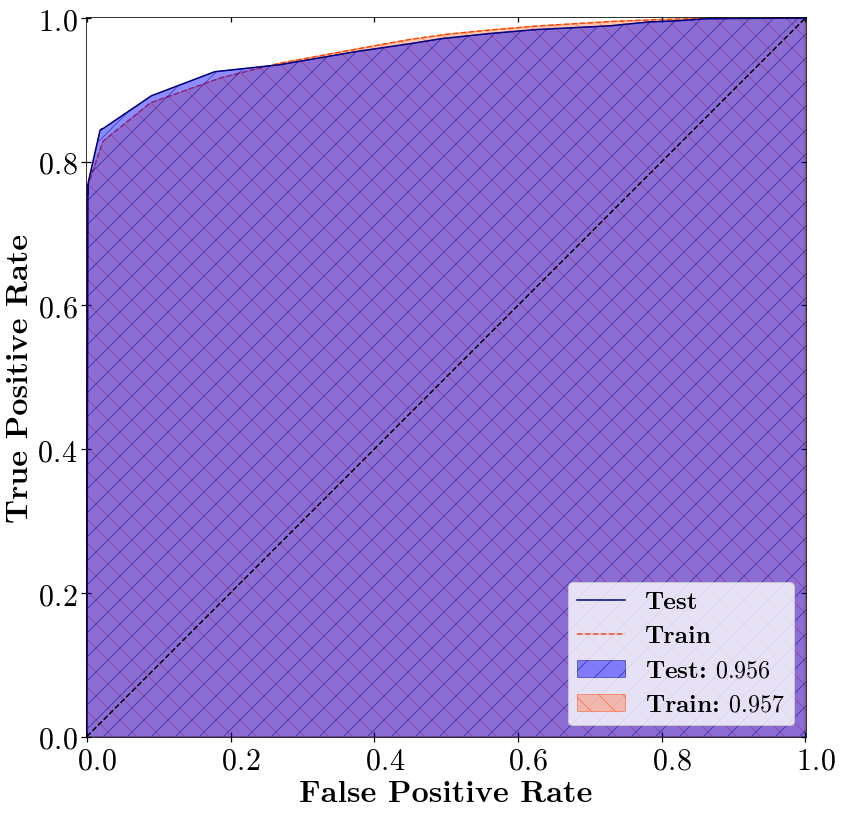

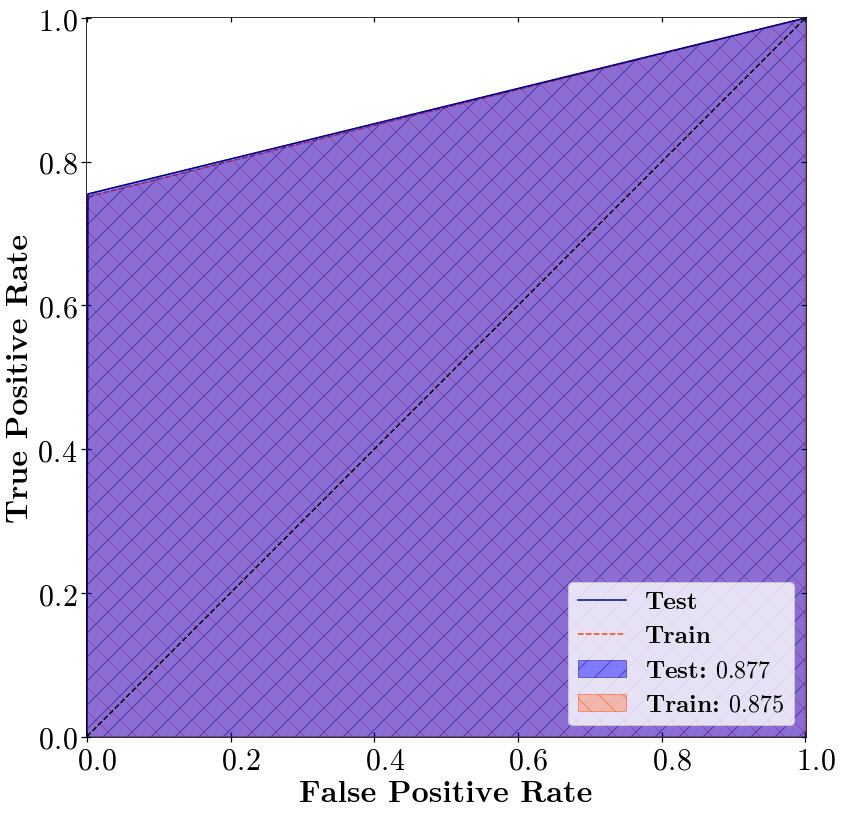

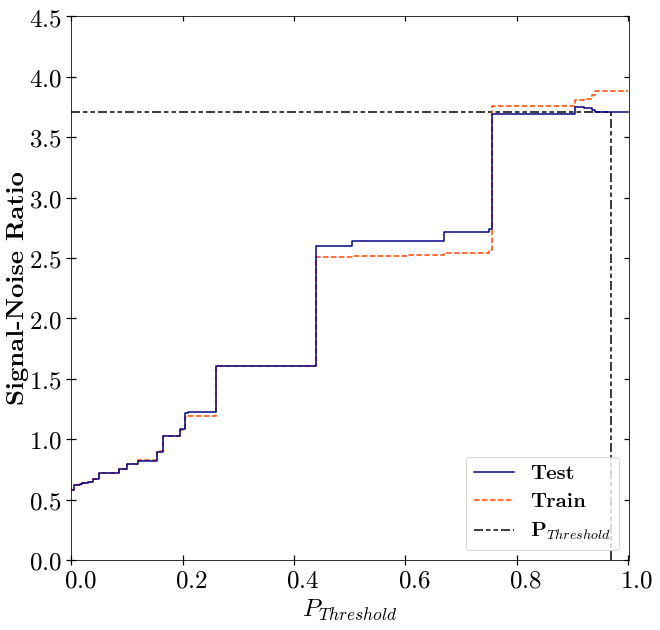

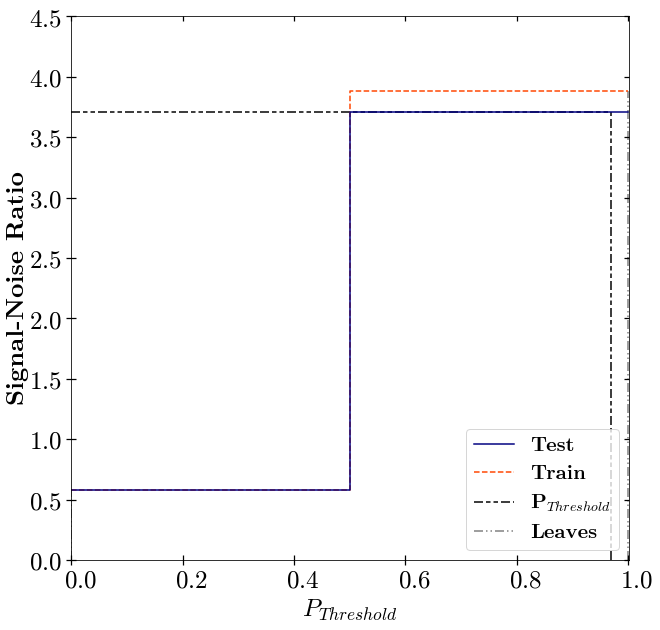

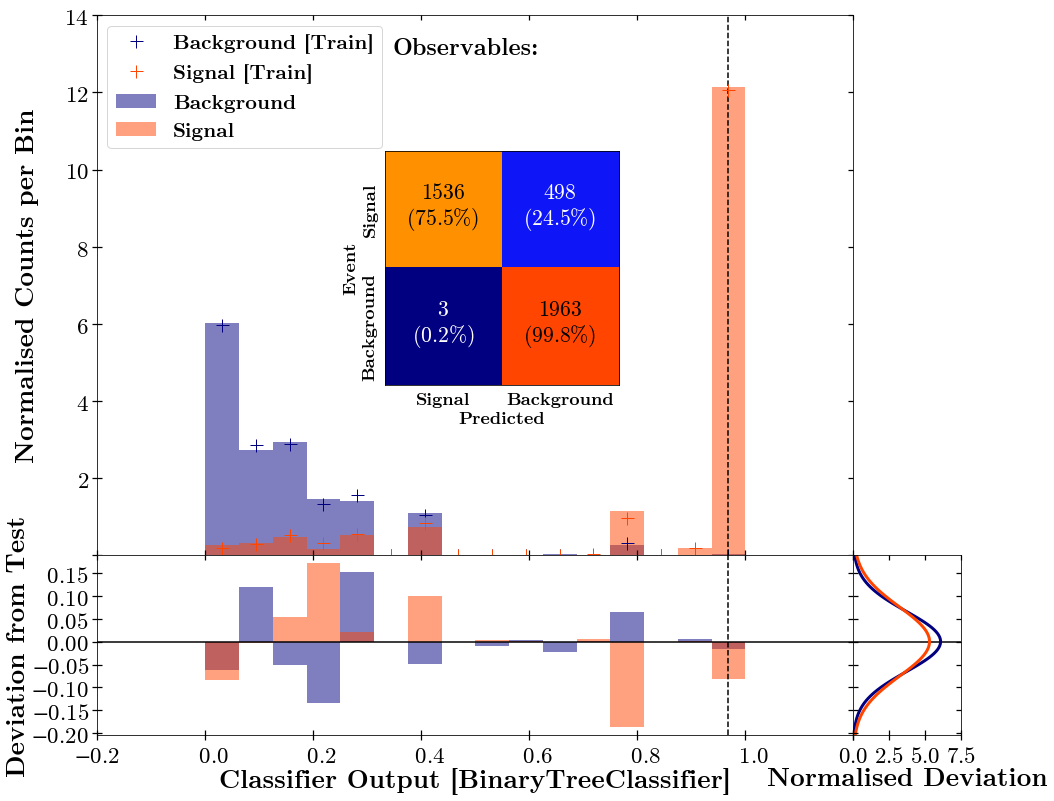

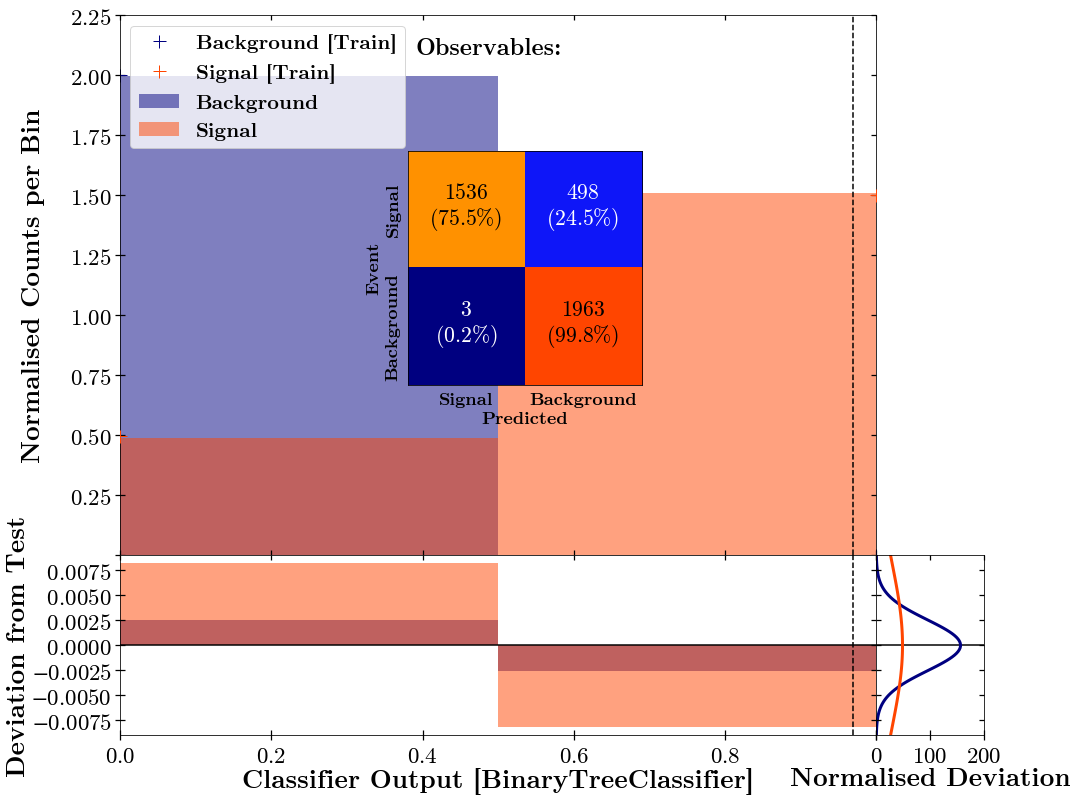

In [2]:
tree = DTC()
bres, bscore = analyse("pp_2mu2e", tree)

In [4]:
tree

<BinaryTreeClassifier(Fitted: True; 'max_depth': 12, 'min_samples_leaf': 0, 'min_samples_split': 800, 'max_observables': None, 'random_minimize': None, 'train_val_frac': 0.75)>

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import StratifiedKFold
from humanfriendly import format_timespan
import dwrangling.pipelines as DWP
import analysis.metrics as AME
from timeit import Timer
import numpy as np
import random

In [5]:
random.seed(0)

df = DWP.get_opt_dataframe("pp_2mu2e")
train_df, test_df = df.train_test_sets(0.8)

In [11]:
sk = DecisionTreeClassifier(max_depth=12, min_samples_leaf=1, min_samples_split=800)

In [12]:
sk.fit(*train_df.ML_input())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=800,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
graph = Source( export_graphviz(sk, feature_names=df.columns[:-1]) )
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [6]:
import os
from graphviz import Source
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [7]:
df.columns.values

array(['Z_e_m', 'Z_mu_m', 'delR_e', 'delR_mu', 'delR_Z', 'm_H', 'signal'],
      dtype=object)

In [8]:
my = DTE()

In [9]:
my.fit(*train_df.ML_input())

minimise by optimizing
--Obs0; cost:0.44495911716968584
--Obs1; cost:0.44805055426990525
--Obs2; cost:0.499661779444715
--Obs3; cost:0.49989405826092403
--Obs4; cost:0.49230024720830945
--Obs5; cost:0.4935845738279586
--Obs0; cost:0.1600005287978389
--Obs1; cost:0.14400795021664187
--Obs2; cost:0.1599450932255499
--Obs3; cost:0.16073696950137176
--Obs4; cost:0.1584898904394161
--Obs5; cost:0.16075678513731845
--Obs0; cost:0.12179453520859045
--Obs1; cost:0.13108005989078747
--Obs2; cost:0.13412862401607736
--Obs3; cost:0.1351064919776771
--Obs4; cost:0.1328271293530964
--Obs5; cost:0.13511489436004906
--Obs0; cost:0.09772006547374183
--Obs1; cost:0.09483020310141337
--Obs2; cost:0.09862535809386791
--Obs3; cost:0.09618359471795228
--Obs4; cost:0.09812243360314221
--Obs5; cost:0.10009989999999994
--Obs0; cost:0.08889134835621718
--Obs1; cost:0.08950760202239062
--Obs2; cost:0.08968933939670277
--Obs3; cost:0.08892376433239071
--Obs4; cost:0.08922839616195813
--Obs5; cost:0.0910059020618

In [10]:
my.show()

Root:{S:84.85| O:0| I:0.50}
 LB:{S:17.25| O:1| I:0.42}
  LB:{P:0.19| I:0.31}
  GB:{S:14.58| O:0| I:0.38}
   LB:{P:0.39| I:0.48}
   GB:{S:94.56| O:1| I:0.32}
    LB:{S:78.50| O:0| I:0.30}
     LB:{S:26.49| O:1| I:0.28}
      LB:{P:0.54| I:0.50}
      GB:{S:91.88| O:3| I:0.25}
       LB:{S:126.62| O:5| I:0.25}
        LB:{S:123.19| O:5| I:0.13}
         LB:{P:0.00| I:0.00}
         GB:{S:124.37| O:5| I:0.01}
          LB:{P:0.43| I:0.49}
          GB:{S:125.60| O:5| I:0.00}
           LB:{S:125.34| O:5| I:0.00}
            LB:{P:1.00| I:0.00}
            GB:{P:0.86| I:0.24}
           GB:{P:0.40| I:0.48}
        GB:{P:0.09| I:0.17}
       GB:{P:0.30| I:0.42}
     GB:{P:0.62| I:0.47}
    GB:{P:0.27| I:0.40}
 GB:{S:37.05| O:1| I:0.46}
  LB:{S:126.09| O:5| I:0.24}
   LB:{S:124.30| O:5| I:0.03}
    LB:{P:0.04| I:0.07}
    GB:{S:125.35| O:5| I:0.01}
     LB:{S:124.96| O:5| I:0.00}
      LB:{P:0.93| I:0.14}
      GB:{S:125.11| O:5| I:0.00}
       LB:{P:1.00| I:0.00}
       GB:{P:0.93| I:0.12}


In [36]:
sk

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=800,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
coll = "pp_2mu2e"
df = get_opt_dataframe(coll)

In [3]:
train_df, test_df = df.train_test_sets(0.8)
obs, lbs = train_df.ML_input()
t, v = BDTClass._split_data(lbs, 0.75)

train_df = ODataFrame.from_ML_input(obs[t], lbs[t],
                                    columns=train_df.columns)
print('Training:', len(train_df), end='; ')

valid_df = ODataFrame.from_ML_input(obs[v], lbs[v],
                                    columns=train_df.columns)
print('Validation:', len(valid_df), end='; ')

print('Testing:', len(test_df))


Training: 12000; Validation: 4000; Testing: 4000


In [4]:
tree = BDTClass(max_depth=13, min_samples_leaf=0,
                min_samples_split=800)
print(tree)
print()

time = Timer("tree._fit(*train_df.ML_input(), gini_impurity)",
             globals=globals()).timeit(1)

vobservables, vlabels = valid_df.ML_input()
predictions = tree._predictions(vobservables)
tree._theshold = tree._get_threshold(vlabels, predictions)
print(tree)
print() 

print('Time Taken:', format_timespan(time, detailed=True))

BinaryTreeClassifier(Fitted: False; 'max_depth': 13, 'min_samples_leaf': 0, 'min_samples_split': 800, 'train_val_frac': 0.75)

BinaryTreeClassifier(Fitted: False; 'max_depth': 13, 'min_samples_leaf': 0, 'min_samples_split': 800, 'train_val_frac': 0.75)

Time Taken: 1 second and 279.29 milliseconds


TreePath(Probability: 0.9; n_leaves: 1)


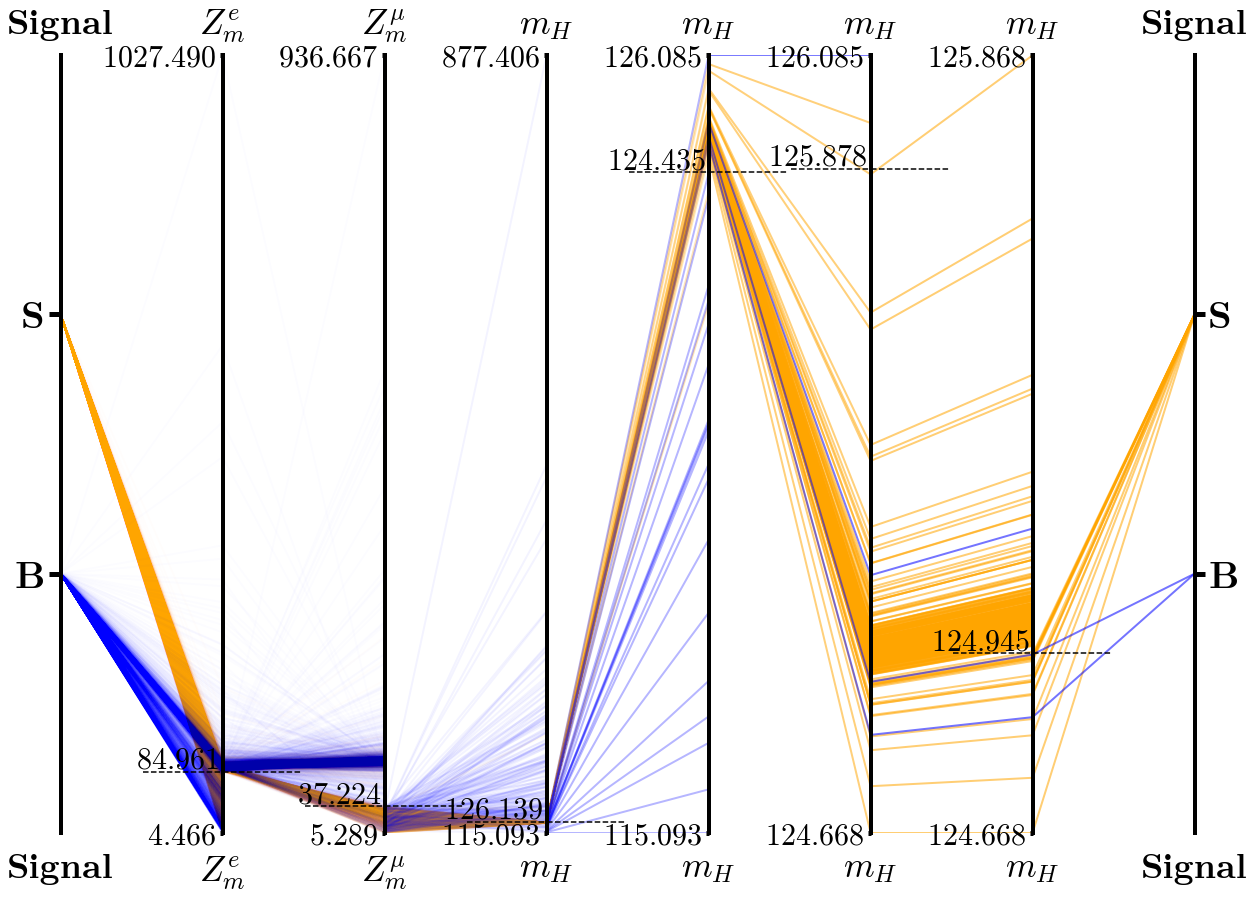

In [5]:
ps = tree.get_probabilities()
path = tree.get_path(ps[-3])
print(path)

figs = show_tree_paths(tree, path.P, train_df,
                       xfontsize=35, yfontsize=30,
                       xlabelpad=20)

In [6]:
for node in path.get_path_sample_generators(train_df)[0]:
    node = [val if (val is not None) else 0.0 for val in node]
    obs, bch, prt, imp, smp = node
    
    print()
    print('-'*85)
    print(f"Observable: {obs}")
    print(f"Branch: {bch}")
    if isinstance(prt, str): print(f"Probability, {prt}")
    else: print(f"Partition Value: {prt:.2f}")
    print(f"Impurity: {imp:.4f}")
    print(f"Samples: {len(smp)}", end="\n\n")

    print("Signal DF:")
    display(smp.get_s().describe())
    print("Bkg DF:")
    display(smp.get_b().describe())

    if input("Continue (y/n): ").lower() == 'n': break


-------------------------------------------------------------------------------------
Observable: signal
Branch: 0.0
Partition Value: 0.00
Impurity: 0.5000
Samples: 12000

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.0
mean,63.569802,63.711808,40.050860,39.998369,4.856110,206.237014,1.0
std,29.709800,29.989927,37.484633,36.432298,2.745222,196.971738,0.0
min,5.575905,5.289038,0.842999,0.509321,3.141593,122.563990,1.0
25%,31.865339,31.646033,14.475284,14.719134,3.151992,124.997989,1.0
50%,77.577906,78.983133,28.409903,29.029185,3.195958,125.001690,1.0
75%,90.782610,90.783355,56.652372,57.518045,9.424849,125.037419,1.0
max,195.757131,240.680637,491.697955,452.236751,10.181016,2238.931138,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.0
mean,81.997796,82.011805,50.144818,50.391665,4.963556,246.743322,0.0
std,33.595076,35.248670,35.229393,37.826674,2.739764,124.478994,0.0
min,4.466278,4.456713,0.581534,0.709764,3.141593,60.006996,0.0
25%,87.361896,86.866452,20.878484,19.490187,3.176041,190.241644,0.0
50%,90.813887,90.788153,45.632857,45.719613,3.312834,224.810003,0.0
75%,92.208444,92.145976,74.404968,74.924029,9.425140,284.456580,0.0
max,1027.489924,936.666520,337.545592,660.834604,10.155831,1499.360097,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: Z_e_m
Branch: >
Partition Value: 84.96
Impurity: 0.5000
Samples: 12000

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.0
mean,63.569802,63.711808,40.050860,39.998369,4.856110,206.237014,1.0
std,29.709800,29.989927,37.484633,36.432298,2.745222,196.971738,0.0
min,5.575905,5.289038,0.842999,0.509321,3.141593,122.563990,1.0
25%,31.865339,31.646033,14.475284,14.719134,3.151992,124.997989,1.0
50%,77.577906,78.983133,28.409903,29.029185,3.195958,125.001690,1.0
75%,90.782610,90.783355,56.652372,57.518045,9.424849,125.037419,1.0
max,195.757131,240.680637,491.697955,452.236751,10.181016,2238.931138,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.0
mean,81.997796,82.011805,50.144818,50.391665,4.963556,246.743322,0.0
std,33.595076,35.248670,35.229393,37.826674,2.739764,124.478994,0.0
min,4.466278,4.456713,0.581534,0.709764,3.141593,60.006996,0.0
25%,87.361896,86.866452,20.878484,19.490187,3.176041,190.241644,0.0
50%,90.813887,90.788153,45.632857,45.719613,3.312834,224.810003,0.0
75%,92.208444,92.145976,74.404968,74.924029,9.425140,284.456580,0.0
max,1027.489924,936.666520,337.545592,660.834604,10.155831,1499.360097,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: Z_mu_m
Branch: <
Partition Value: 37.22
Impurity: 0.4641
Samples: 7414

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.0
mean,91.142666,56.350001,58.783449,41.079060,4.923436,295.993167,1.0
std,3.933956,33.984527,44.392729,46.308369,2.760098,258.204945,0.0
min,84.975910,5.289038,2.018212,0.761191,3.141593,122.563990,1.0
25%,89.811616,26.500996,27.663976,12.242387,3.154433,124.999823,1.0
50%,90.963481,34.105819,52.789605,23.562511,3.217772,125.026296,1.0
75%,91.958307,91.049164,78.943602,57.680171,9.425000,391.806094,1.0
max,195.757131,240.680637,491.697955,452.236751,10.181016,2238.931138,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.0
mean,94.463927,88.908903,57.128097,55.154331,5.023115,275.344750,0.0
std,23.926014,29.480621,35.042735,38.314447,2.761630,115.227602,0.0
min,84.970406,5.567261,1.760878,1.043918,3.141593,115.093199,0.0
25%,90.359792,89.581362,30.031874,25.507707,3.182501,206.971445,0.0
50%,91.364445,91.102776,56.021188,52.547359,3.343509,240.320934,0.0
75%,92.719412,92.411674,80.334807,78.691749,9.425617,302.513828,0.0
max,1027.489924,936.666520,337.545592,660.834604,10.155831,1499.360097,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: m_H
Branch: <
Partition Value: 126.14
Impurity: 0.2455
Samples: 1661

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.0
mean,90.463533,24.942921,47.414575,15.969952,4.900498,125.097518,1.0
std,2.012609,7.353810,25.628516,8.273546,2.801937,2.367728,0.0
min,84.981140,5.289038,2.707926,0.761191,3.141593,122.563990,1.0
25%,89.435224,19.879523,25.171451,8.896130,3.147809,124.996863,1.0
50%,90.658775,26.967414,46.912958,15.134887,3.173709,125.000092,1.0
75%,91.565267,30.606287,69.868145,22.735743,9.425049,125.003507,1.0
max,101.226203,37.147116,93.839816,47.949794,9.495428,211.320407,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,96.762096,19.885618,50.214030,16.744107,5.136224,177.823271,0.0
std,22.057112,9.085067,32.108919,14.053893,2.820226,73.339756,0.0
min,85.440985,5.567261,2.119437,2.137722,3.141601,115.093199,0.0
25%,90.335580,11.922564,24.284199,8.012564,3.191221,134.908175,0.0
50%,91.447802,18.645739,47.057865,12.445303,3.345533,156.864075,0.0
75%,93.473228,26.898042,73.836769,19.510887,9.426119,200.164367,0.0
max,293.636829,37.198503,212.683100,131.248701,9.925178,877.405624,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: m_H
Branch: >
Partition Value: 124.43
Impurity: 0.0315
Samples: 1438

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.0
mean,90.456668,24.931596,47.430974,15.930300,4.901410,125.001037,1.0
std,2.013063,7.343840,25.620757,8.224062,2.802350,0.085064,0.0
min,84.981140,5.289038,2.707926,0.761191,3.141593,122.563990,1.0
25%,89.396410,19.879523,25.171451,8.893782,3.147809,124.996821,1.0
50%,90.657873,26.961012,47.106740,15.133415,3.173709,125.000058,1.0
75%,91.557765,30.586537,69.868145,22.710821,9.425049,125.003417,1.0
max,101.226203,37.147116,93.839816,36.773247,9.495428,125.961505,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,91.216558,17.592973,47.636826,11.806802,5.614229,120.929105,0.0
std,1.879019,7.375709,23.881022,5.458495,3.129167,3.243371,0.0
min,88.610312,6.016531,9.657389,2.137722,3.141607,115.093199,0.0
25%,89.918215,12.079658,30.935482,7.369550,3.143958,118.719866,0.0
50%,90.865556,17.871213,45.860062,10.370248,3.183377,120.887113,0.0
75%,91.895161,22.713215,63.812715,16.189328,9.425741,123.449573,0.0
max,95.837598,31.297103,90.050549,21.275247,9.452792,126.084880,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: m_H
Branch: <
Partition Value: 125.88
Impurity: 0.0056
Samples: 1417

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.0
mean,90.462209,24.927616,47.454295,15.933480,4.903888,125.003360,1.0
std,2.008266,7.347985,25.617987,8.227673,2.803559,0.050286,0.0
min,84.981140,5.289038,2.707926,0.761191,3.141593,124.668190,1.0
25%,89.429020,19.869292,25.180400,8.893017,3.147816,124.996847,1.0
50%,90.658108,26.961012,47.106740,15.133415,3.173894,125.000067,1.0
75%,91.559718,30.591749,69.887426,22.727862,9.425056,125.003422,1.0
max,101.226203,37.147116,93.839816,36.773247,9.495428,125.961505,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,93.055777,12.244722,39.007295,10.508426,7.857084,125.253141,0.0
std,2.082906,7.406633,7.265388,7.206727,3.142137,0.567536,0.0
min,91.453113,6.016531,29.846715,6.019354,3.143883,124.846722,0.0
25%,91.460451,6.756372,35.376772,6.940960,7.854753,124.919179,0.0
50%,92.466198,10.474878,39.661068,7.369550,9.425053,125.040481,0.0
75%,94.061524,15.963229,43.291590,10.937016,9.427385,125.374443,0.0
max,95.837598,22.012602,46.860329,21.275247,9.434348,126.084880,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: m_H
Branch: <
Partition Value: 124.95
Impurity: 0.0042
Samples: 1415

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.0
mean,90.461872,24.930987,47.438449,15.931273,4.900672,125.002682,1.0
std,2.008938,7.349495,25.620135,8.230170,2.801944,0.043351,0.0
min,84.981140,5.289038,2.707926,0.761191,3.141593,124.668190,1.0
25%,89.421403,19.867495,25.175925,8.890803,3.147813,124.996841,1.0
50%,90.657991,26.964213,47.009849,15.123131,3.173802,125.000062,1.0
75%,91.560988,30.592610,69.902398,22.728686,9.425045,125.003415,1.0
max,101.226203,37.147116,93.839816,36.773247,9.495428,125.867874,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,93.586737,13.991968,36.389617,11.595180,9.428151,124.975895,0.0
std,2.194592,7.998132,6.169714,8.415413,0.005366,0.148163,0.0
min,91.453113,6.016531,29.846715,6.019354,9.425043,124.846722,0.0
25%,92.461306,9.981651,33.533420,6.755146,9.425053,124.895027,0.0
50%,93.469500,13.946771,37.220124,7.490938,9.425063,124.943331,0.0
75%,94.653549,17.979687,39.661068,14.383093,9.429706,125.040481,0.0
max,95.837598,22.012602,42.102011,21.275247,9.434348,125.137631,0.0


Continue (y/n): y

-------------------------------------------------------------------------------------
Observable: signal
Branch: 0.0
Probability, P = 0.9
Impurity: 0.1800
Samples: 20

Signal DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,90.678476,23.544146,46.142232,13.346328,5.945132,124.887414,1.0
std,2.662616,6.531131,30.318523,9.856948,3.209811,0.074704,0.0
min,85.774608,9.888364,6.117679,1.881840,3.141593,124.668190,1.0
25%,89.163892,18.581899,16.063192,3.816990,3.150546,124.881299,1.0
50%,90.699326,24.648760,52.817799,11.710709,3.173244,124.907934,1.0
75%,92.779312,27.841462,69.472669,25.219970,9.426454,124.937491,1.0
max,94.754094,34.776304,88.970070,27.323783,9.451638,124.944122,1.0


Bkg DF:


,Z_e_m,Z_mu_m,delR_e,delR_mu,delR_Z,m_H,signal
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,92.461306,14.014566,35.974363,14.383093,9.429695,124.895027,0.0
std,1.425800,11.310931,8.665802,9.746978,0.006580,0.068313,0.0
min,91.453113,6.016531,29.846715,7.490938,9.425043,124.846722,0.0
25%,91.957210,10.015548,32.910539,10.937016,9.427369,124.870874,0.0
50%,92.461306,14.014566,35.974363,14.383093,9.429695,124.895027,0.0
75%,92.965403,18.013584,39.038187,17.829170,9.432022,124.919179,0.0
max,93.469500,22.012602,42.102011,21.275247,9.434348,124.943331,0.0


Continue (y/n): y


In [7]:
_, labs = test_df.ML_input()
labs_pred = tree.predict(_)
print('Testing:')
print('-', labs, f"-> len({len(labs)})")
print('-', labs_pred, f"-> len({len(labs_pred)})")
_labs_pred = tree.predict_prob(_)

_, vllabs = valid_df.ML_input()
vllabs_pred = tree.predict(_)
print('Validation:')
print('-', vllabs, f"-> len({len(vllabs)})")
print('-', vllabs_pred, f"-> len({len(vllabs_pred)})")
_vllabs_pred = tree.predict_prob(_)

_, trlabs = train_df.ML_input()
trlabs_pred = tree.predict(_)
print('Training:')
print('-', trlabs, f"-> len({len(trlabs)})")
print('-', trlabs_pred, f"-> len({len(trlabs_pred)})")
_trlabs_pred = tree.predict_prob(_)

Testing:
- [1 1 1 ... 0 0 0] -> len(4000)
- [0. 1. 0. ... 0. 0. 0.] -> len(4000)
Validation:
- [0. 0. 0. ... 1. 1. 1.] -> len(4000)
- [0. 0. 0. ... 1. 0. 0.] -> len(4000)
Training:
- [0. 0. 0. ... 1. 1. 1.] -> len(12000)
- [0. 0. 0. ... 0. 0. 0.] -> len(12000)


In [8]:
p_thres = tree.threshold

resDict = OrderedDict()
resDict[''] = (labs, labs_pred)
resDict['Validate'] = (vllabs, vllabs_pred)
resDict['Train'] = (trlabs, trlabs_pred)

_resDict = OrderedDict()
_resDict[''] = (labs, _labs_pred)
_resDict['Validate'] = (vllabs, _vllabs_pred)
_resDict['Train'] = (trlabs, _trlabs_pred)

In [9]:
title = ' Classifier Results '
scores = AM.get_scores(resDict, p_threshold=p_thres)
print(f'{title:=^90}')
print(f"p_thres: {p_thres}")
for k, v in scores.items(): print(k,':',v)

title = ' Estimated Class Results '
_scores = AM.get_scores(_resDict, p_threshold=p_thres)
print(f'{title:~^90}')
for k in ['auc', 'rmsd']: print(k,':',_scores[k])

=================================== Classifier Results ===================================
p_thres: 0.8405405405405406
cm : {'tn': 1931, 'fp': 2, 'fn': 657, 'tp': 1410}
a : 0.83525
p : 0.9985835694050992
tpr : 0.6821480406386067
fpr : 0.0010346611484738748
f1 : 0.8542357885423578
auc : 0.8405566897450664
s/b : 3.5754215500438575
rmsd : {'b': 0.02013481302334022, 's': 0.10300271755217077}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Estimated Class Results ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
auc : 0.9382458213730358
rmsd : {'b': 0.2738387064277222, 's': 0.19644693273010425}


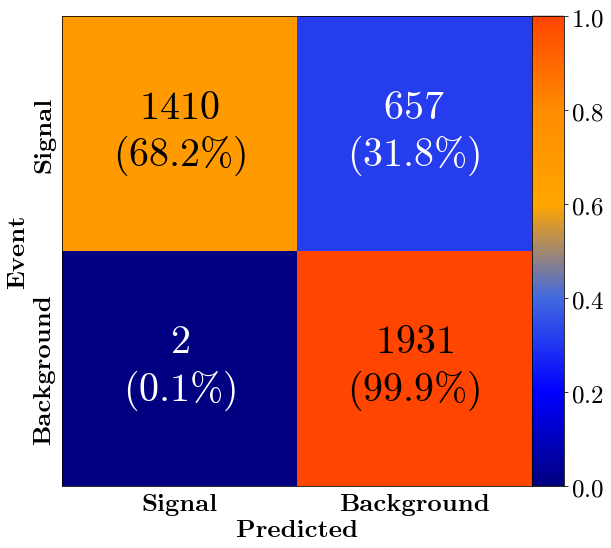

In [10]:
cmap = std_cmap.copy().set_middle(False)
fig = APC.plot_confusion_matrix(*resDict[''], p_thres, cmap=cmap)

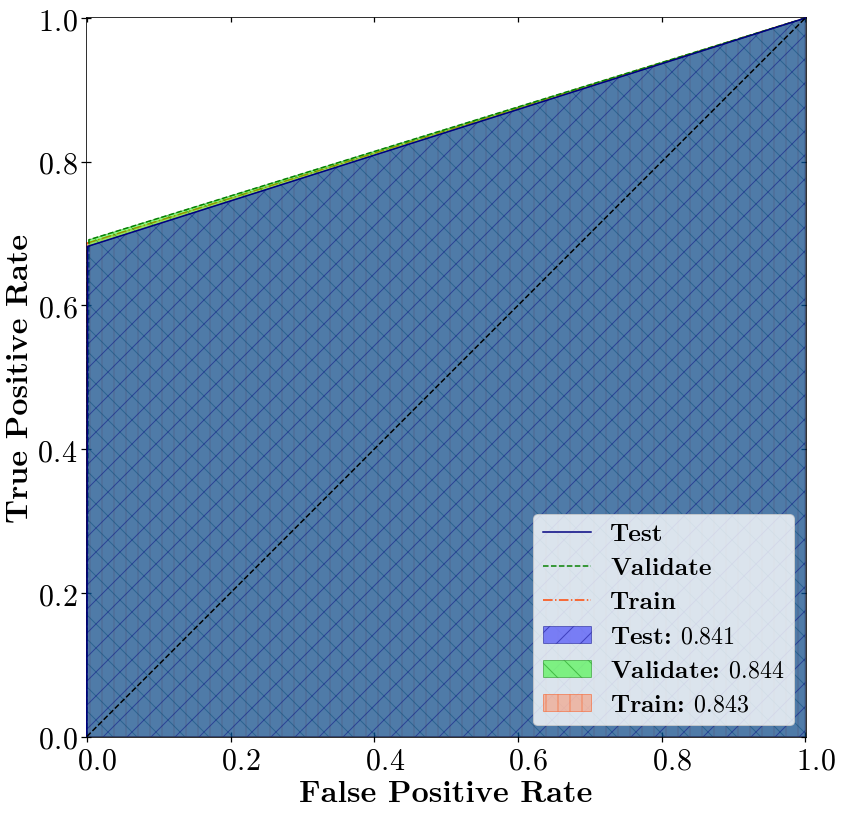

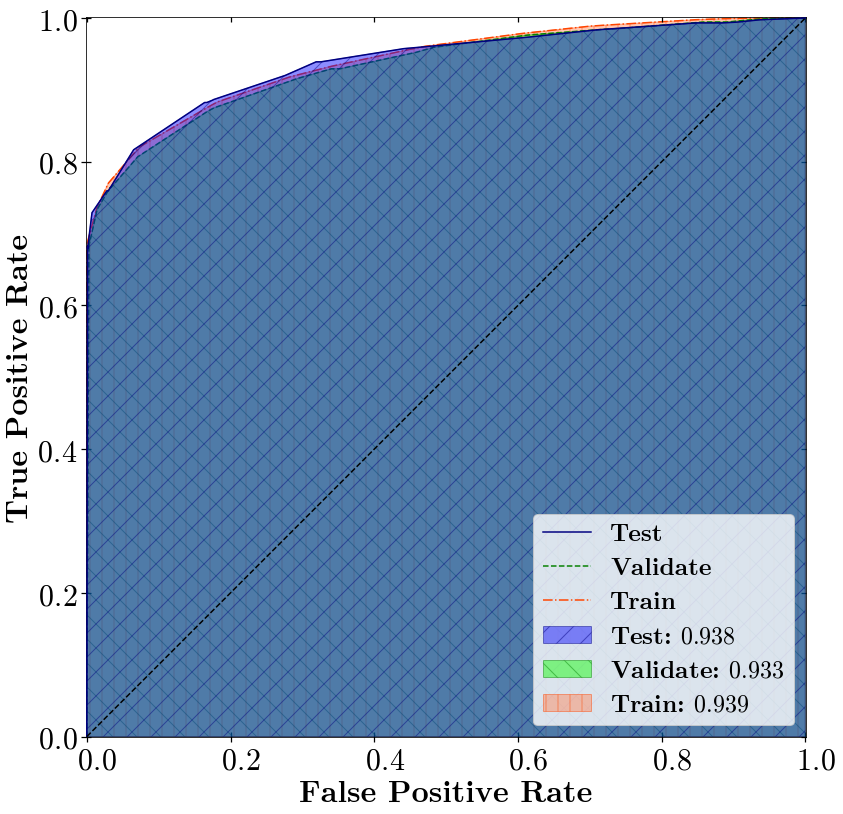

In [11]:
resDict.rename('', 'Test'); _resDict.rename('', 'Test')
cmap = std_cmap.copy().set_middle(True, 'green')
fig = APC.ROC_curve(resDict, cmap=cmap, alpha=0.45)
_fig = APC.ROC_curve(_resDict, cmap=cmap, alpha=0.45)

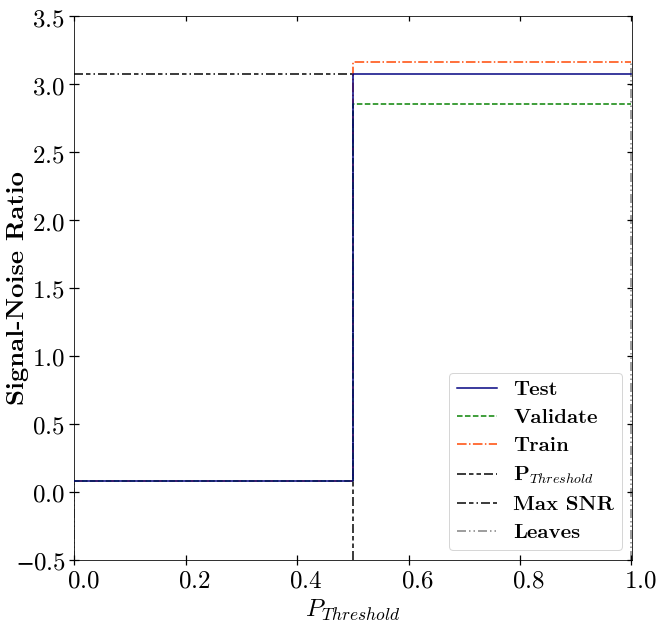

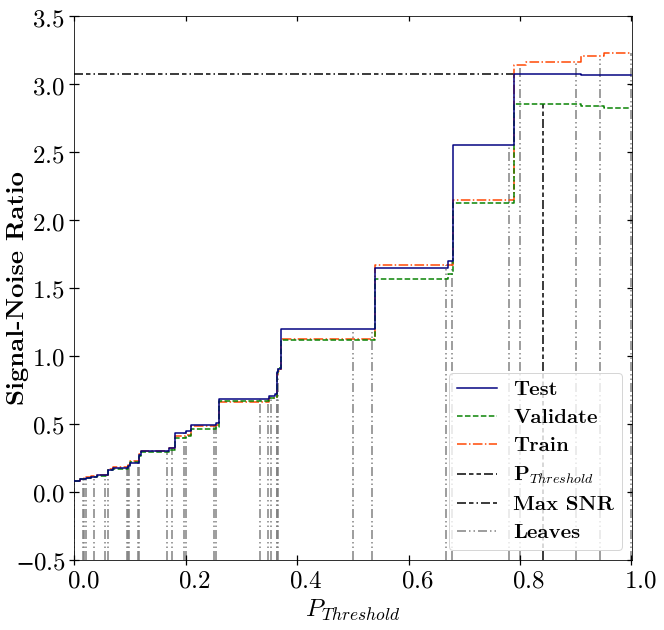

In [12]:
fig = APC.SNRatio(resDict, leaves_thresholds=True,
                  cmap=cmap, n_thresholds=2, square='back')
_fig = APC.SNRatio(_resDict, leaves_thresholds=True,
                   cmap=cmap, square='back')

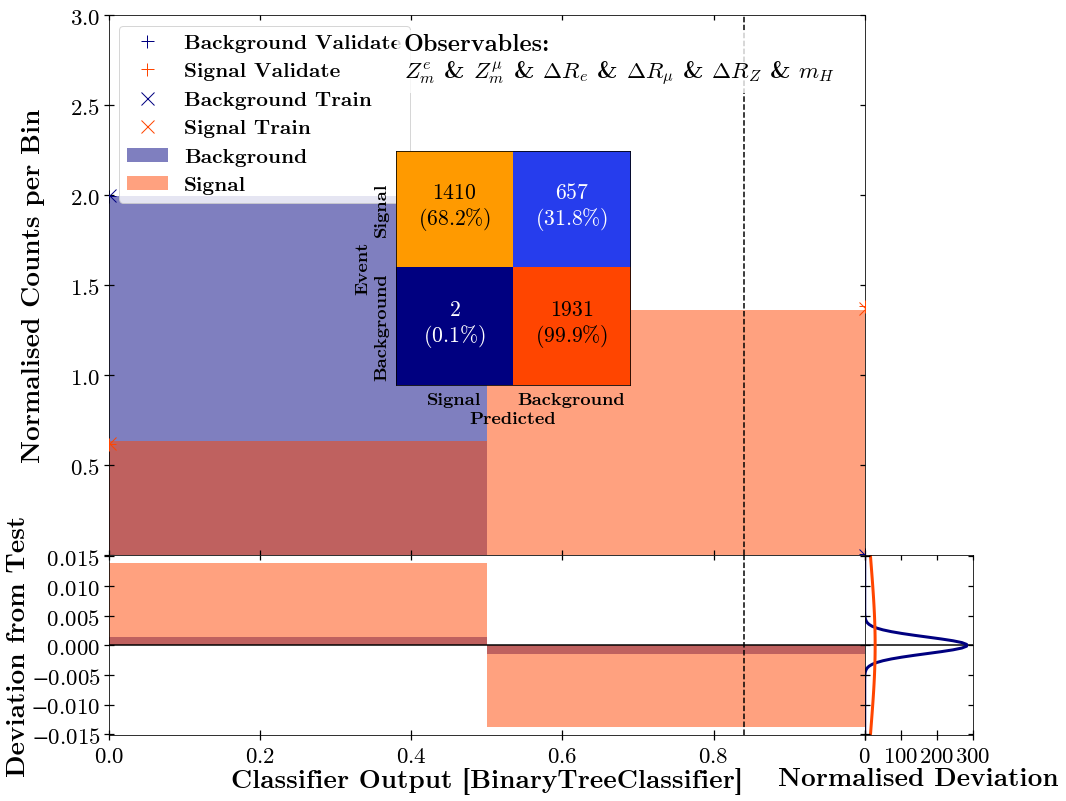

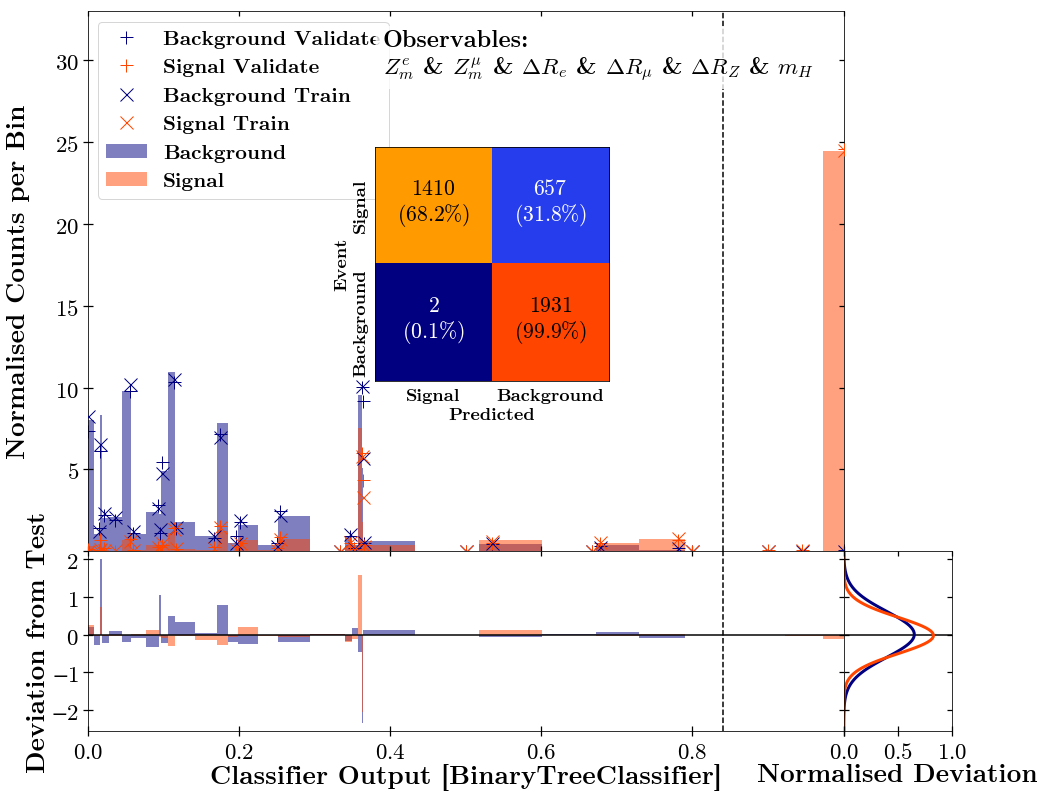

In [13]:
fig = APC.plot_results(tree, resDict, p_threshold=p_thres,
                       n_bins=50, hist=True, obs_pos=(0,0), 
                       observables=df.columns[:-1], cm_pos=(0,0),
                       cm_scale=1, ydifpad=0, y_max=3)
fig = APC.plot_results(tree, _resDict, p_threshold=p_thres,
                       n_bins=50, hist=True, obs_pos=(0,0), 
                       observables=df.columns[:-1], cm_pos=(0,0),
                       cm_scale=1, ydifpad=0, y_max=33)

## No Validation

In [14]:
train_df, test_df = df.train_test_sets(0.8)
print('Training:', len(train_df), end='; ')
print('Testing:', len(test_df))

Training: 16000; Testing: 4000


In [40]:
tree = BDTClass(max_depth=13, min_samples_leaf=0,
                min_samples_split=800)
print(tree)
print()

time = Timer("tree.fit(*train_df.ML_input())",
             globals=globals()).timeit(1)

print(tree)
print() 

print('Time Taken:', format_timespan(time, detailed=True))

BinaryTreeClassifier(Fitted: False; 'max_depth': 13, 'min_samples_leaf': 0, 'min_samples_split': 800, 'train_val_frac': 0.75)

BinaryTreeClassifier(Fitted: True; 'max_depth': 13, 'min_samples_leaf': 0, 'min_samples_split': 800, 'train_val_frac': 0.75)

Time Taken: 1 second and 304.75 milliseconds


TreePath(Probability: 0.9642857142857143; n_leaves: 1)


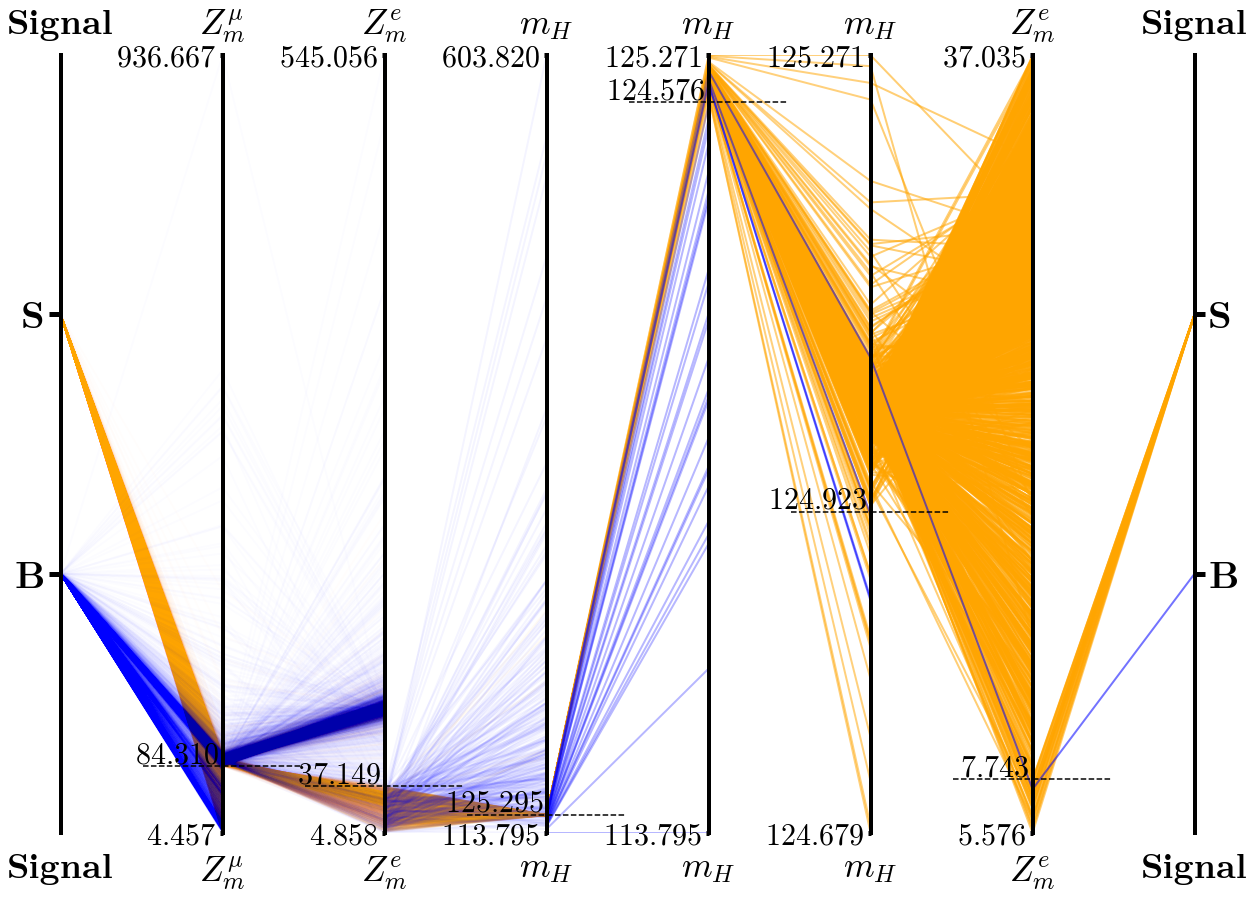

In [21]:
ps = tree.get_probabilities()
path = tree.get_path(ps[-3])
print(path)

figs = show_tree_paths(tree, path.P, train_df,
                       xfontsize=35, yfontsize=30,
                       xlabelpad=20)

In [22]:
_, labs = test_df.ML_input()
labs_pred = tree.predict(_)
print('Testing:')
print('-', labs, f"-> len({len(labs)})")
print('-', labs_pred, f"-> len({len(labs_pred)})")
labs_pred = tree.predict_prob(_)
print('-', labs_pred, f"-> len({len(labs_pred)})")

_, trlabs = train_df.ML_input()
trlabs_pred = tree.predict(_)
print('Training:')
print('-', trlabs, f"-> len({len(trlabs)})")
print('-', trlabs_pred, f"-> len({len(trlabs_pred)})")
trlabs_pred = tree.predict_prob(_)
print('-', trlabs_pred, f"-> len({len(trlabs_pred)})")

Testing:
- [1 1 1 ... 0 0 0] -> len(4000)
- [1. 0. 1. ... 0. 0. 0.] -> len(4000)
- [1.         0.70580475 1.         ... 0.14032258 0.70580475 0.39447732] -> len(4000)
Training:
- [0 0 0 ... 1 1 1] -> len(16000)
- [0. 0. 0. ... 1. 0. 1.] -> len(16000)
- [0.07806691 0.08384458 0.00250313 ... 1.         0.08384458 1.        ] -> len(16000)


In [24]:
p_thres = tree.threshold

resDict = OrderedDict()
resDict[''] = (labs, labs_pred)
resDict['Train'] = (trlabs, trlabs_pred)

In [25]:
title = ' Classifier Results '
scores = AM.get_scores(resDict, p_threshold=p_thres)
print(f'{title:=^90}')
print(f"p_thres: {p_thres}")
for k, v in scores.items(): print(k,':',v)

=================================== Classifier Results ===================================
p_thres: 0.9128787878787878
cm : {'tn': 1960, 'fp': 2, 'fn': 441, 'tp': 1597}
a : 0.88925
p : 0.9987492182614134
tpr : 0.7836113837095191
fpr : 0.0010193679918450561
f1 : 0.8984643593857438
auc : 0.9554000244088116
s/b : 3.8550427116548875
rmsd : {'b': 0.17879436415335656, 's': 0.19714250868273253}


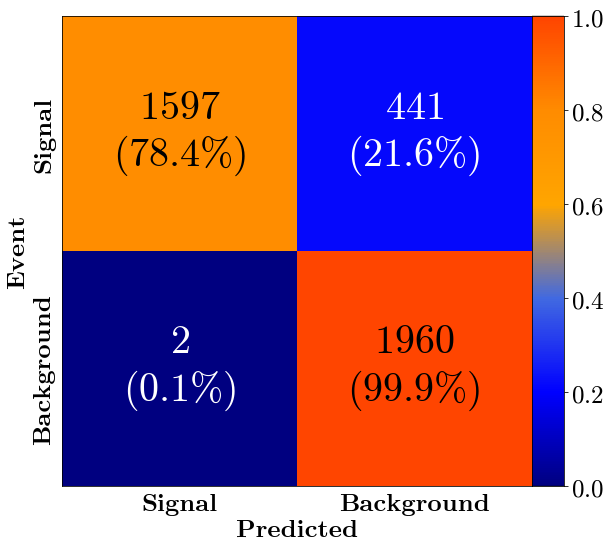

In [26]:
cmap = std_cmap.copy().set_middle(False)
fig = APC.plot_confusion_matrix(*resDict[''], p_thres, cmap=cmap)

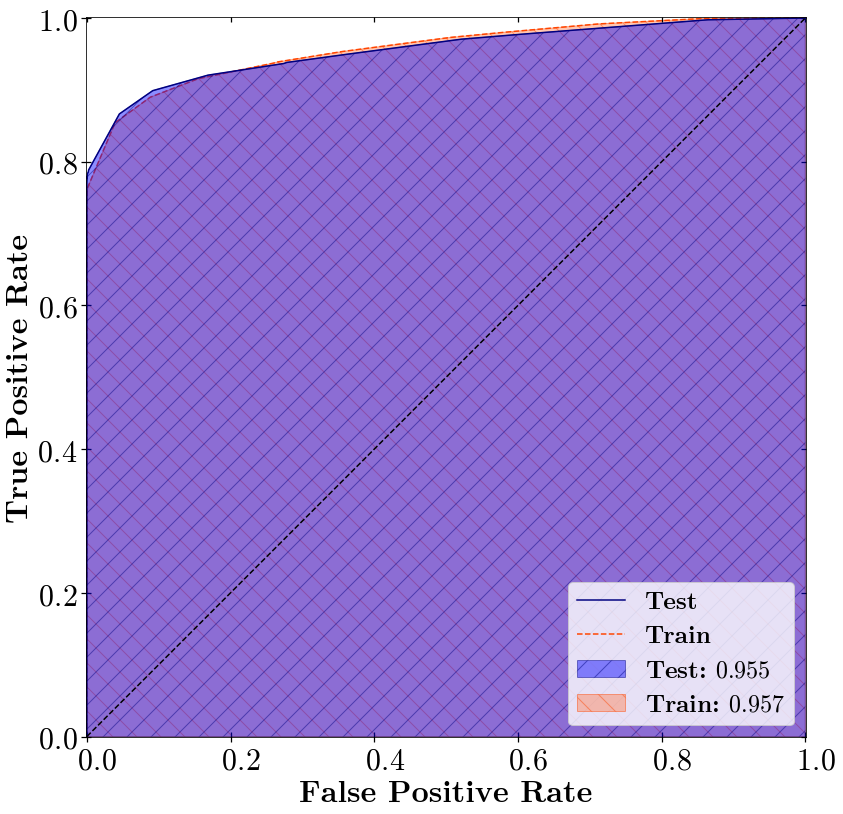

In [27]:
resDict.rename('', 'Test'); _resDict.rename('', 'Test')
cmap = std_cmap.copy().set_middle(True, 'green')
fig = APC.ROC_curve(resDict, cmap=cmap, alpha=0.45)

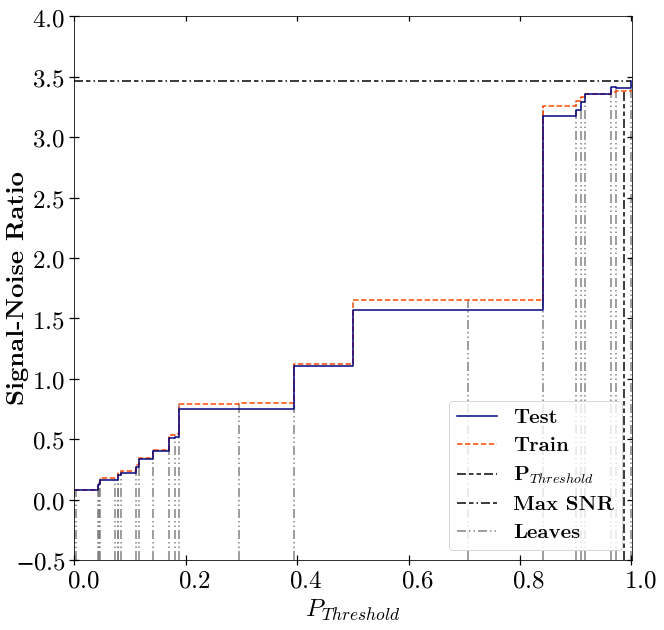

In [28]:
fig = APC.SNRatio(resDict, leaves_thresholds=True,
                  cmap=cmap, n_thresholds=2, square='back')

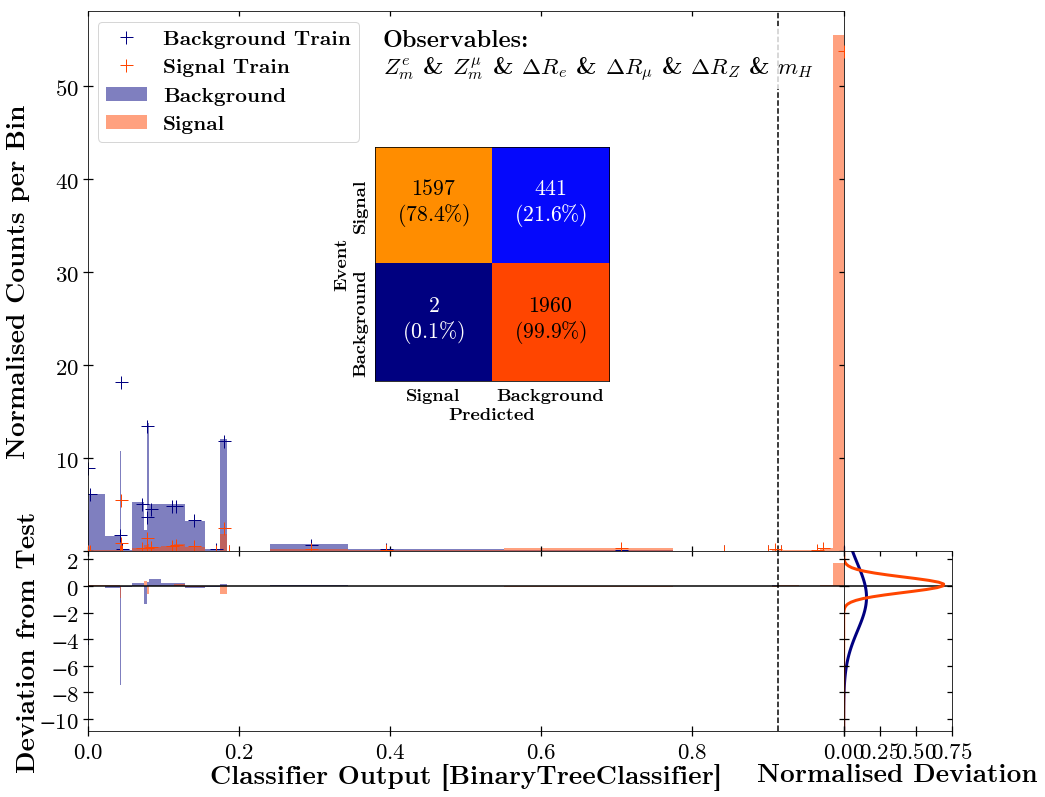

In [38]:
resDict.rename('Train', '[Train]')
fig = APC.plot_results(tree, resDict, p_threshold=p_thres,
                       n_bins=50, hist=True, obs_pos=(0,0), 
                       observables=df.columns[:-1], cm_pos=(0,0),
                       cm_scale=1, ydifpad=0, y_max=58)